*Nombre de Grupos*: Perception Roll Failed

*Integrantes*: Santiago Rocca, Maximiliano Fisz

## **Ejercicio**: Visualizar Difference of Gaussians (DoG)

Implementar una piramide Gaussiana (Aplicar un filtro Gaussiano consecutivamente a una imagen) y calcular Difference of Gaussians (DoG) para una imagen de entrada. Visualizar el resultado.

3


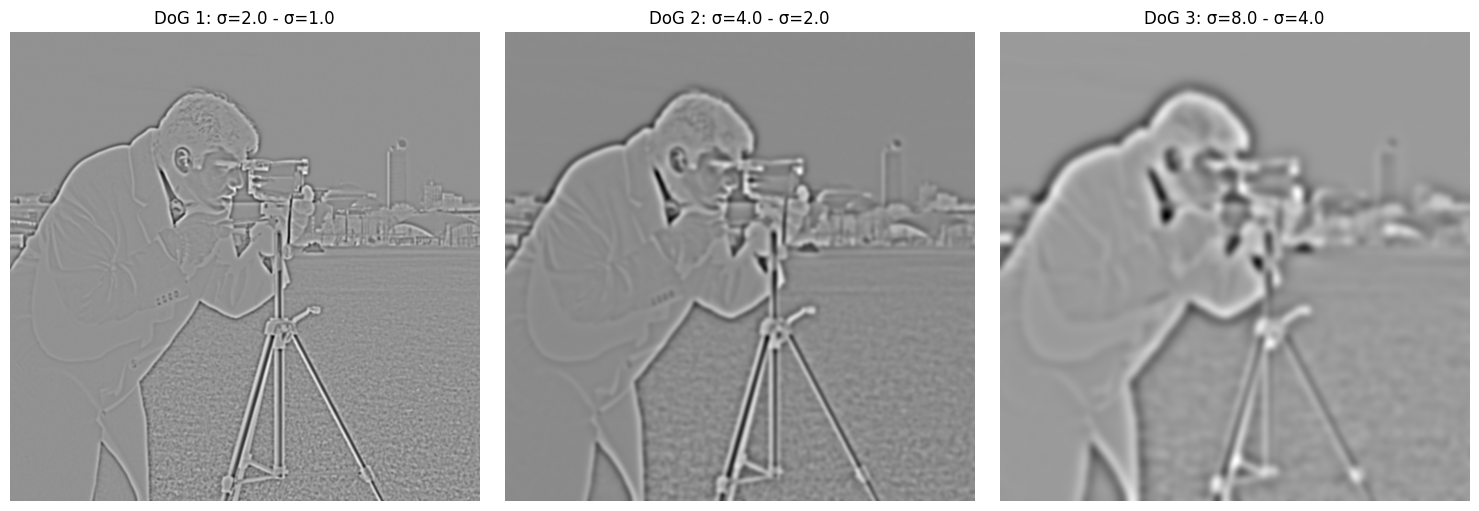

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, data

# Cargamos una imagen y la pasamos a gris.
image = data.camera()

# Definimos la escalas de sigmas que usaremos en la piramide.
sigmas = [1.0, 2.0, 4.0, 8.0]
gaussians = []

# Generamos las imagens blureadas
for sigma in sigmas:
    gaussians.append(filters.gaussian(image,sigma))



# Calculamos DoG (Difference of Gaussians)
dogs = []
for i in range(0,len(gaussians)-1):
    dogs.append(gaussians[i+1]-gaussians[i])

print(len(dogs))
fig, axes = plt.subplots(1, len(dogs), figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(dogs[i], cmap='gray')
    ax.set_title(f'DoG {i+1}: σ={sigmas[i+1]} - σ={sigmas[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## **Muestra**: Deteccion de Keypoint y Matcheo

Detectar keypoints de SIFT en dos imagenes y matchear los descriptores.Visualizamos el matcheo.


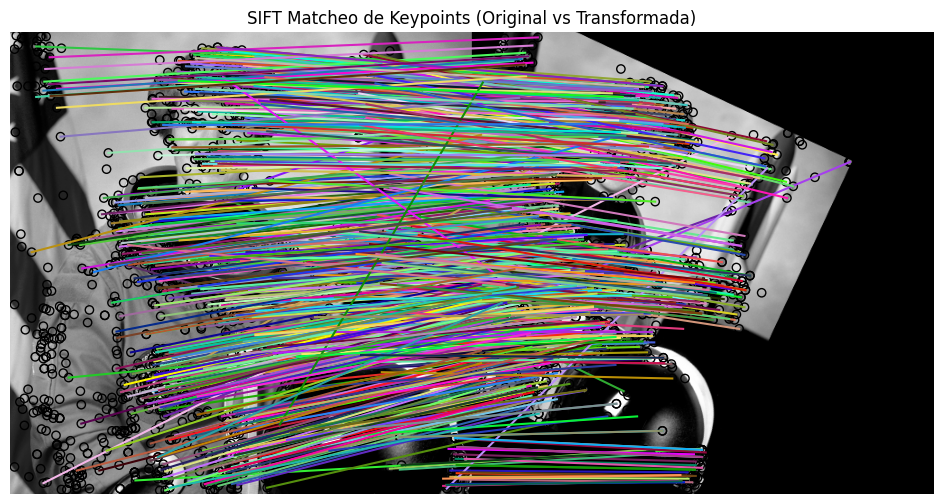

In [ ]:
from skimage import data, color, feature, transform
from skimage.feature import match_descriptors, plot_matched_features
import matplotlib.pyplot as plt
import numpy as np

# Cargamos una imagen de ejemplo
image1 = color.rgb2gray(data.astronaut())

# Creamos una copia transformada para poder matchear
tform = transform.AffineTransform(scale=(0.8, 0.8), rotation=np.deg2rad(25), translation=(50, -30))
image2 = transform.warp(image1, tform.inverse)

# Inicializamos Sift y encontramos los keypoints
sift1 = feature.SIFT()
sift1.detect_and_extract(image1)

sift2 = feature.SIFT()
sift2.detect_and_extract(image2)

# Macheamos los keypoints entre las dos imagenes
matches = match_descriptors(sift1.descriptors, sift2.descriptors, cross_check=True)

fig, ax = plt.subplots(figsize=(12, 6))

plot_matched_features(
    image1,
    image2,
    keypoints0=sift1.keypoints,
    keypoints1=sift2.keypoints,
    matches=matches, # Mostramos solo algunos matches para que sea facil de ver.
    ax=ax)

ax.axis('off')
ax.set_title('SIFT Matcheo de Keypoints (Original vs Transformada)')
plt.show()